In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv("mushrooms.csv")



In [9]:
X = df.drop(["veil-type","bruises","gill-spacing","gill-size","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","ring-number","ring-type","spore-print-color","veil-color"], axis=1)
print(X.shape)
X = pd.get_dummies(X,drop_first=True)
Y = X["class_p"]
X = X.drop(["class_p"],axis=1)
print(X.shape)

(8124, 9)
(8124, 48)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.4)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print("train_score = ",lr.score(X_train,y_train))
print("test_score = ", lr.score(X_test,y_test))




train_score =  0.9917931883463275
test_score =  0.9910769230769231


In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("mushrooms.csv")
df = df.astype("category")
le=LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
X = df.drop(["veil-type","bruises","gill-spacing","gill-size","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","ring-number","ring-type","spore-print-color","veil-color"], axis=1)

Y = X["class"]
X = X.drop(["class"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.4)
Rtree = DecisionTreeRegressor(random_state=1,min_samples_leaf=30,max_depth=10)
Rtree.fit(X_train,y_train)

print("Train Tree ", Rtree.score(X_train,y_train))
print("test Tree ", Rtree.score(X_test,y_test))


Train Tree  0.9533798421647444
test Tree  0.9487696851000633
(8124, 8)


In [18]:
from sklearn.model_selection import GridSearchCV

parms = {'min_impurity_decrease':[0.0001,0.0002,0.0003,0.0004,0.0005],
         'max_depth' : range(5,50,1),
         'min_samples_split' : range(2,100,10)}

gs = GridSearchCV(DecisionTreeRegressor(random_state=42), parms,n_jobs=-1)
gs = gs.fit(X_train, y_train)
bst = gs.best_params_
print(gs.best_score_)
print(bst)
DTR = DecisionTreeRegressor(random_state=42,min_impurity_decrease=0.0001,min_samples_split=2,max_depth=13)
DTR.fit(X_train,y_train)
print("DTR : ", DTR.score(X_train,y_train))
print("DTR : ", DTR.score(X_test,y_test))

0.9772508960286842
{'max_depth': 13, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}
DTR :  0.9847212193694225
DTR :  0.9720927330269121


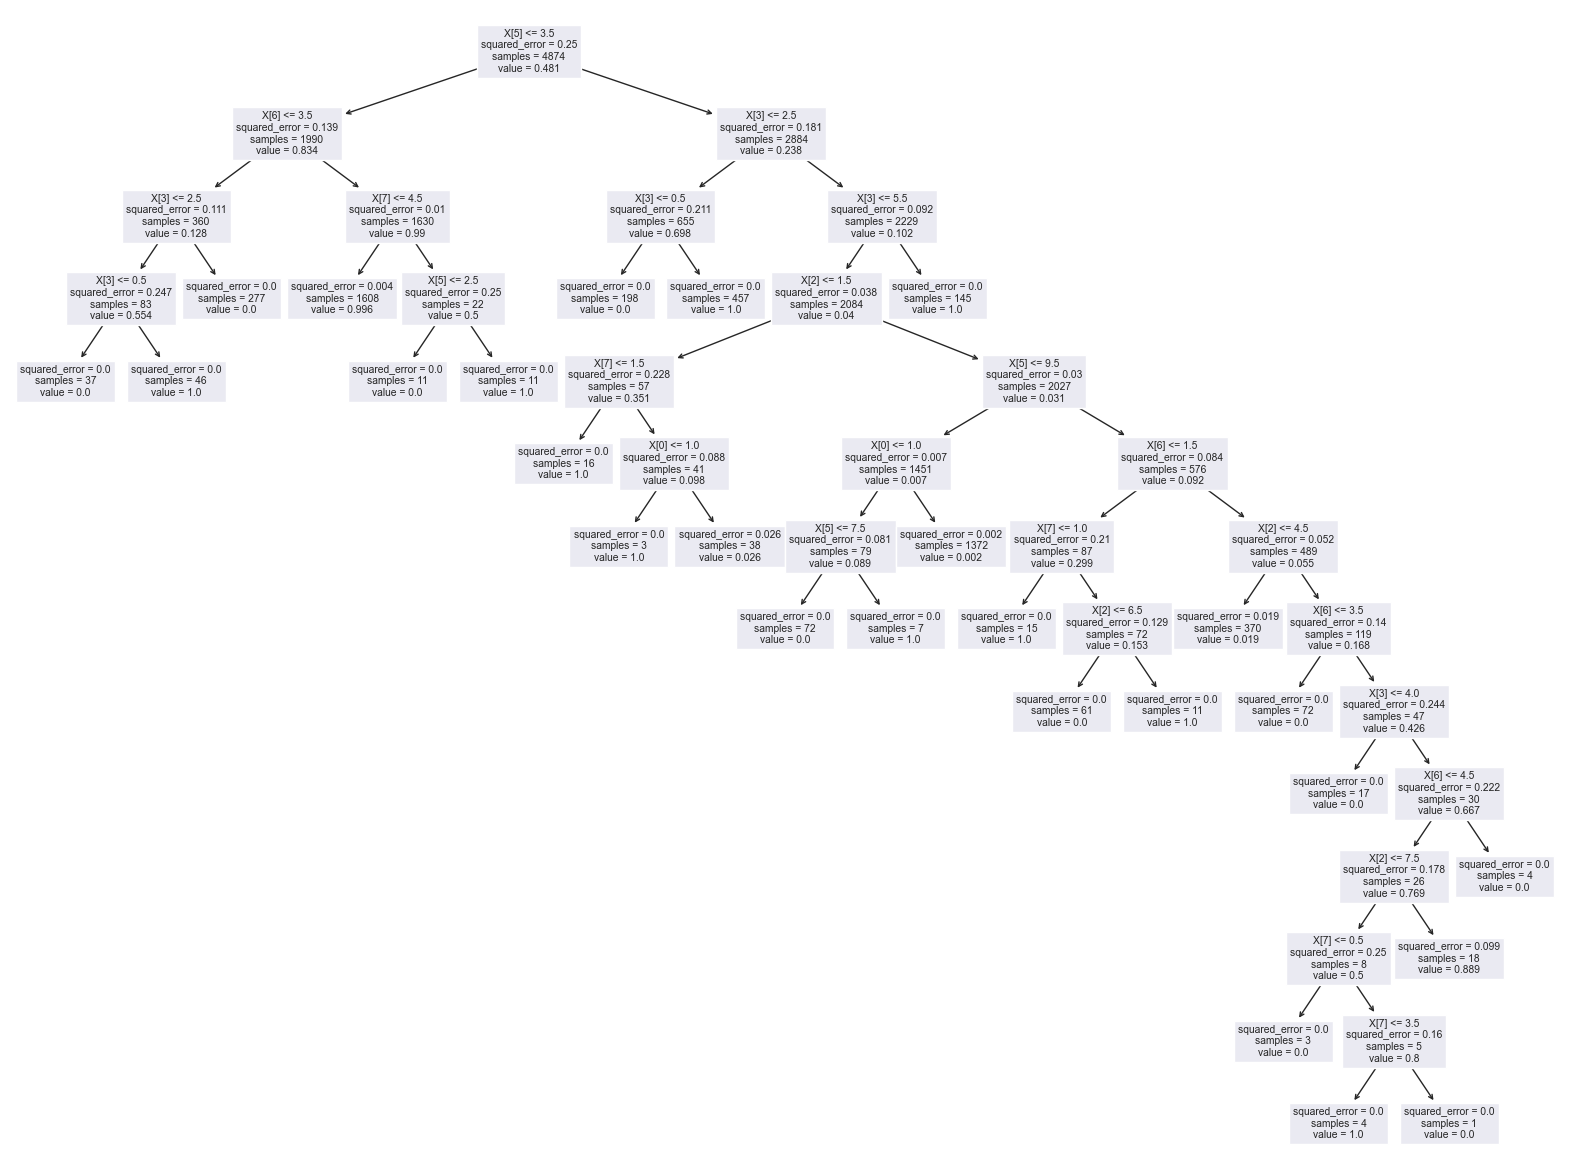

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plot_tree(DTR)
plt.show()

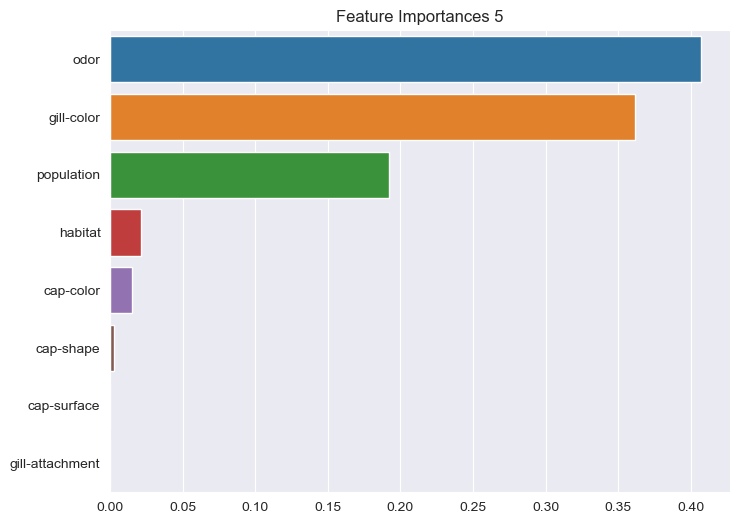

In [16]:
import seaborn as sns
feature_importance_values = DTR.feature_importances_
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)

feature_top5 = feature_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()